<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом! 

**Пожалуйста, не удаляй мои комментарии**, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
 
Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Построим модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Нам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [1]:
import sklearn # Проверка версии sklearn. Обновляем при необходимости
if sklearn.__version__[0] == '0':
    !pip install scikit-learn -U # После установки надо перезапустить ядро
sklearn.__version__ 

'1.5.1'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
try:
    from ydata_profiling import ProfileReport
except:
    !pip install -U Pillow # Для решения ошибки с профайлером
    !pip install -U ydata-profiling
    from ydata_profiling import ProfileReport

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

try:
    from optuna.integration import OptunaSearchCV
    from optuna.distributions import IntDistribution, CategoricalDistribution
except:
    !pip install optuna.integration
    from optuna.integration import OptunaSearchCV
    from optuna.distributions import IntDistribution, CategoricalDistribution

from sklearn.metrics import root_mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')

In [3]:
RANDOM_STATE = 42

## Подготовка

Начнём с загрузки данных. Нулевой столбец прочтём как datetime, и сразу-же определим его в индексы.

In [4]:
try:
    ds = pd.read_csv('/datasets/taxi.csv', parse_dates = [0], index_col='datetime')
except:
    ds = pd.read_csv('datasets/taxi.csv', parse_dates = [0], index_col='datetime')
ds.info()
ds.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28


Теперь проведём ресемплинг. Нам необходимо сделать прогноз на следующий час, значит и данные должны быть представлены в ежечасных записях.

In [5]:
ds = ds.resample('1h').sum()
ds.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71


Теперь данные готовы к анализу.

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b> 
    
С данными познакомились, проведен первичный аналитический осмотр!) Отлично, что проведено ресемплирование с использованием суммы. Полученная информация поможет нам в дальнейшем с предобработкой данных

## Анализ

Проведём EDA, разведочный анализ данных. Чтобы проанализировать заодно и время заказов - сбросим индекс на момент генерации отчёта.

In [6]:
ProfileReport(ds.reset_index())

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В нашем распоряжении данные с марта по август 2018 года включительно. Пропусков в данных нет. Есть экстремальные значения в данных о количестве заказов - от 0 до 462 заказов за 1 час, но такая ситуация не невозможна. В целом, в данных нет ничего, что требовало-бы исправления.

Самое время на наши данные взглянуть, всё-таки это временной ряд.

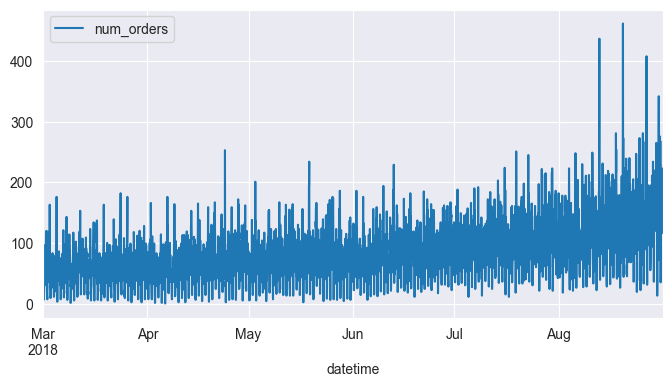

In [7]:
ds.plot(figsize=(8, 4));

Ничего, кроме плавного повышения количества заказов, а также нескольких аномальных пиков, в этой вакханалии разглядеть не получится. Разложим временной ряд на сезонность, тренд и остатки.

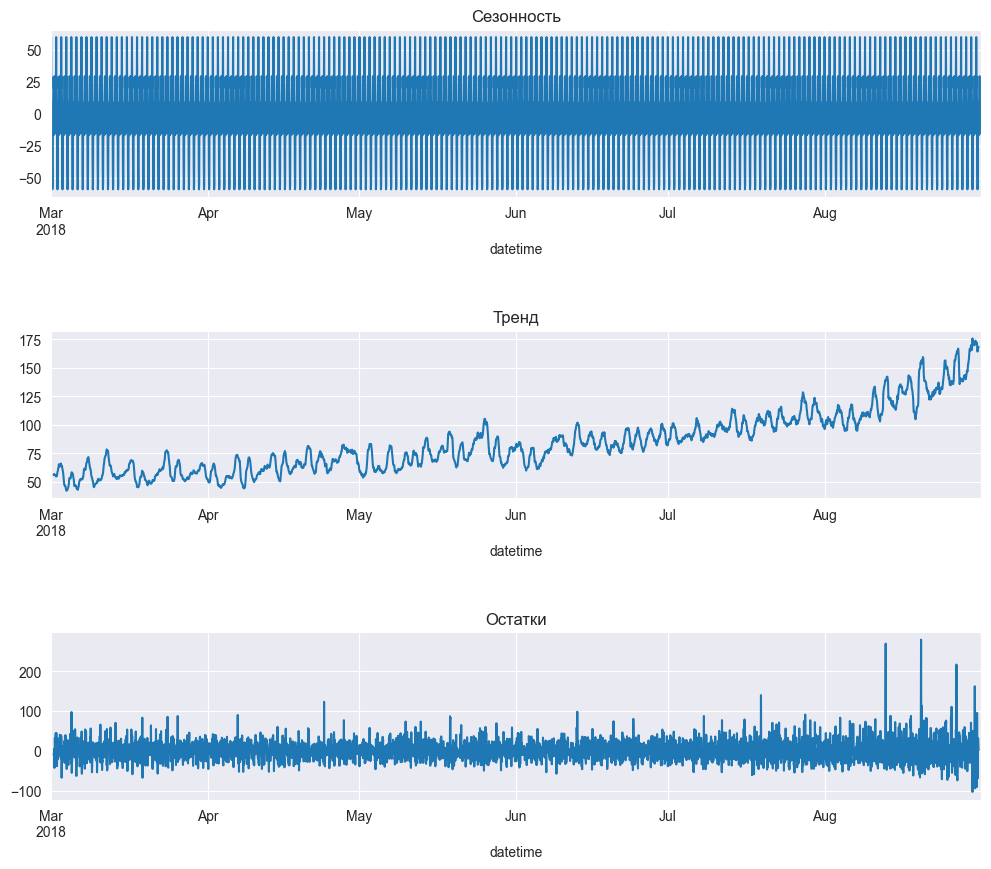

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

seasonal_decompose(ds).seasonal.plot(ax=axes[0], title='Сезонность')
seasonal_decompose(ds).trend.plot(ax=axes[1], title='Тренд')
seasonal_decompose(ds).resid.plot(ax=axes[2], title='Остатки')

plt.subplots_adjust(hspace=0.8)

Сезонность имеет крайне малый шаг. Возможно около одного дня, позже посмотрим на это поближе. Тренд показывает возрастание общего числа заказов под конец временного ряда, в июле и августе. Остатки имеют более выраженные выбросы в конце августа.

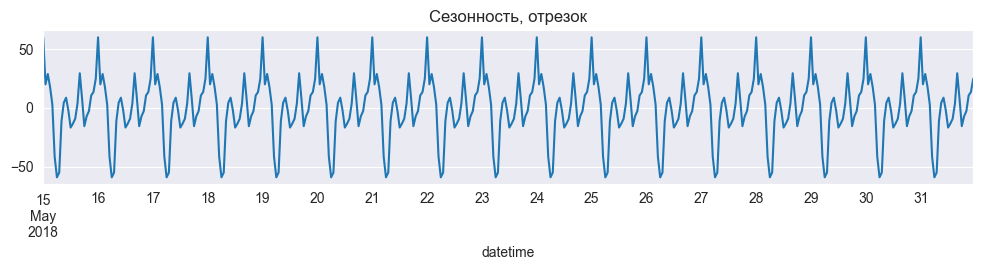

In [9]:
seasonal_decompose(ds).seasonal['2018-05-15':'2018-05-31'].plot(figsize=(12, 2), title='Сезонность, отрезок');

Количество заказов резко снижается через пару часов после полуночи, чтобы к раннему утру вновь вернуться на привычные позиции и дойти до своего пика ближе к вечеру. И так день за днём, месяц за месяцем. Итого сезонность обусловлена снижением спроса на такси посреди ночи и повышением спроса в вечернее время.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще провести разложение на тренды и сезонность, использую метод seasonal_decompose: https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
    
Желательно сначала провести декомпозицию всего ряда (изучить сезонность, тренд), а затем взять подотрезок: `seasonal_decompose(data).seasonal['2018-07-31':'2018-08-31']` (изучить сезонность)   
Добавь, пожалуйста
 </div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Разложил весь ряд и отдельный отрезок для сезонности, для всего вывел графики.
</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще добавить вывод, и описать найденные особенности в тренде и сезонности. 
Добавь, пожалуйста
 </div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Дописал выводы.
</div> 

Теперь подготовим данные для обучения. Само по себе время заказа не слишком информативно, а других входных данных у нас нет. Займёмся feature engineering'ом. А чтобы вручную не перебирать значения - создадим кастомный трансформер. Он будет принимать на вход все признаки, и творить с ними необходимую магию, чтобы потом передать всё готовенькое модели.

In [10]:
class DateFeatures(TransformerMixin, BaseEstimator): # Класс для преобразования признаков в пайплайне
    def __init__(self, lag=2, rm_size1=5, rm_size2=5): # Передаём количество отстающих значений и размеры двух скользящих средних
        self.lag = lag
        self.rm_size1 = rm_size1
        self.rm_size2 = rm_size2
        self.isittest = False
    
    def fit(self, X, y): # Обучение классу не требуется, скипаем
        self.isittest = False
        self.testv = X['num_orders'].tail(self.lag)
        return self
    
    def transform(self, X): # Из индекса достаются части даты, создаются скользящие средние и отстающие значения
        dc = X.copy()
        dc['month'] = dc.index.month
        dc['day'] = dc.index.day
        dc['dow'] = dc.index.dayofweek
        dc['hour'] = dc.index.hour
        dc['rmean1'] = dc['num_orders'].shift().rolling(self.rm_size1).mean() # Это не баг, это фича. Скользящих средних два, размеры подбираются подборщиком гиперпараметров независимо друг от друга.
        dc['rmean2'] = dc['num_orders'].shift().rolling(self.rm_size2).mean()
        
        for i in range(1, self.lag+1):
            dc['lag_'+str(i)] = ds['num_orders'].shift(i)
            if self.isittest: # Если обрабатываются тестовые данные - пропуски отстающих значений заполняются сохраненными данными из тренировочной выборки
                ds['num_orders'].iloc[:i] = self.testv[:i]
        dc = dc.drop('num_orders', axis=1)
        dc = dc.fillna(-1) # Пропуски из-за сдвига заполняем индикаторным значением
        self.isittest = True
        return dc

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Отлично, что написана функция, которая возвращает новый датафрейм, а не изменяет глобальную переменную            

## Обучение

In [11]:
def cval_result(obj): # Функция для презентации результатов 
    print('Время обучения лучшей модели:', obj.cv_results_['mean_fit_time'][obj.best_index_].round(3))
    print('Метрика на лучшей модели:', np.round(abs(obj.best_score_), 3))

Разделим данные на выборки. Они должны быть непрерывными, так-что не будем их перемешивать.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    ds,  # Целевой признак передаётся вместе с обучающими данными и удаляется при генерации признаков. Использовать эти выборки для обучения моделей напрямую нельзя
    ds['num_orders'], 
    shuffle=False, 
    random_state=RANDOM_STATE, 
    test_size=0.1)

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Хорошо, что деление происходит последовательно по времени

Теперь подготовим все нужные объекты для обучения. Для подбора гиперпараметров использовать будем OptunaSearchCV. Из моделей возьмём лёгкий градиентный бустинг, случайный лес и одну модель попроще, например регрессор kneighbors.

In [13]:
lgbm = Pipeline([
    ('features', DateFeatures()),
    ('model', LGBMRegressor(random_state=RANDOM_STATE, verbosity=-1))
])
lgbm_params = {
    'features__lag':IntDistribution(1, 26),
    'features__rm_size1':IntDistribution(3, 100),
    'features__rm_size2':IntDistribution(3, 50),
    'model__num_leaves':IntDistribution(2, 48),
    'model__max_depth':IntDistribution(6, 80),
    'model__learning_rate':CategoricalDistribution([0.2, 0.4, 0.6, 0.8]) 
}
lgbm_cv = OptunaSearchCV(
    lgbm, 
    param_distributions=lgbm_params, 
    cv=TimeSeriesSplit(5), 
    n_trials=22, 
    random_state=RANDOM_STATE, 
    scoring='neg_root_mean_squared_error') # При n_jobs=-1 обучение быстрее, но при каждом запуске разный результат

C:\Users\m8913\AppData\Local\Temp\ipykernel_10924\1663226333.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  lgbm_cv = OptunaSearchCV(


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
При работе с временными рядами не следует использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа нужно передать в параметр cv в метод основанный на кросс-валидации
    
(это касается абсолютно всех моделей, всех cross_val_score и всех SearchCV)
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Поменял тип кросс-валидации, и случайный лес вырвался вперёд. Он лучше приспособлен для временных рядов? Хотя может быть и случайность, у них и до этого RMSE был почти равным.
</div> 

In [14]:
forest = Pipeline([
    ('features', DateFeatures()),
    ('model', RandomForestRegressor(random_state=RANDOM_STATE))
])
forest_params = {
    'features__lag':IntDistribution(1, 26),
    'features__rm_size1':IntDistribution(3, 100),
    'features__rm_size2':IntDistribution(3, 50),
    'model__n_estimators':IntDistribution(50, 100),
    'model__max_depth':IntDistribution(8, 120),
    'model__min_samples_split':IntDistribution(2, 12),
    'model__min_samples_leaf':IntDistribution(1, 20)
}
forest_cv = OptunaSearchCV(
    forest, 
    param_distributions=forest_params, 
    cv=TimeSeriesSplit(5), 
    n_trials=8, 
    random_state=RANDOM_STATE, 
    scoring='neg_root_mean_squared_error')

C:\Users\m8913\AppData\Local\Temp\ipykernel_10924\1790872591.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  forest_cv = OptunaSearchCV(


In [15]:
neighbor = Pipeline([
    ('features', DateFeatures()),
    ('model', KNeighborsRegressor())
])
neighbor_params = {
    'features__lag':IntDistribution(1, 26),
    'features__rm_size1':IntDistribution(3, 100),
    'features__rm_size2':IntDistribution(3, 50),
    'model__n_neighbors':IntDistribution(5, 50),
    'model__p':CategoricalDistribution([1, 2])
}
neighbor_cv = OptunaSearchCV(
    neighbor, 
    param_distributions=neighbor_params, 
    cv=TimeSeriesSplit(5), 
    n_trials=18, 
    random_state=RANDOM_STATE, 
    scoring='neg_root_mean_squared_error')

C:\Users\m8913\AppData\Local\Temp\ipykernel_10924\2659309871.py:12: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  neighbor_cv = OptunaSearchCV(


Все объекты готовы, последовательно запустим обучение моделей и сразу-же выведем лучшие метрики.

In [16]:
lgbm_cv.fit(X_train, y_train)
cval_result(lgbm_cv)

[I 2024-07-12 09:46:09,148] A new study created in memory with name: no-name-1cee535f-9eba-41f2-a39f-129250d3e9b1
[I 2024-07-12 09:46:09,617] Trial 0 finished with value: -25.67005290698258 and parameters: {'features__lag': 12, 'features__rm_size1': 84, 'features__rm_size2': 6, 'model__num_leaves': 17, 'model__max_depth': 42, 'model__learning_rate': 0.2}. Best is trial 0 with value: -25.67005290698258.
[I 2024-07-12 09:46:10,102] Trial 1 finished with value: -29.657208790831408 and parameters: {'features__lag': 9, 'features__rm_size1': 37, 'features__rm_size2': 50, 'model__num_leaves': 25, 'model__max_depth': 23, 'model__learning_rate': 0.8}. Best is trial 0 with value: -25.67005290698258.
[I 2024-07-12 09:46:10,824] Trial 2 finished with value: -30.22901906523424 and parameters: {'features__lag': 12, 'features__rm_size1': 96, 'features__rm_size2': 24, 'model__num_leaves': 45, 'model__max_depth': 72, 'model__learning_rate': 0.8}. Best is trial 0 with value: -25.67005290698258.
[I 2024-

Время обучения лучшей модели: 0.098
Метрика на лучшей модели: 25.035


In [17]:
forest_cv.fit(X_train, y_train)
cval_result(forest_cv)

[I 2024-07-12 09:46:20,293] A new study created in memory with name: no-name-0e80104a-6039-4c02-a1bb-8e82f42b8a25
[I 2024-07-12 09:46:24,565] Trial 0 finished with value: -25.088992389384753 and parameters: {'features__lag': 12, 'features__rm_size1': 84, 'features__rm_size2': 6, 'model__n_estimators': 66, 'model__max_depth': 62, 'model__min_samples_split': 5, 'model__min_samples_leaf': 5}. Best is trial 0 with value: -25.088992389384753.
[I 2024-07-12 09:46:27,194] Trial 1 finished with value: -25.24137140890183 and parameters: {'features__lag': 5, 'features__rm_size1': 20, 'features__rm_size2': 18, 'model__n_estimators': 67, 'model__max_depth': 120, 'model__min_samples_split': 7, 'model__min_samples_leaf': 5}. Best is trial 0 with value: -25.088992389384753.
[I 2024-07-12 09:46:32,162] Trial 2 finished with value: -25.57221139875932 and parameters: {'features__lag': 11, 'features__rm_size1': 49, 'features__rm_size2': 44, 'model__n_estimators': 99, 'model__max_depth': 59, 'model__min_s

Время обучения лучшей модели: 2.31
Метрика на лучшей модели: 24.859


In [18]:
neighbor_cv.fit(X_train, y_train)
cval_result(neighbor_cv)

[I 2024-07-12 09:47:04,459] A new study created in memory with name: no-name-e5c2728b-9b6a-4f38-ab02-844c5b9590ba
[I 2024-07-12 09:47:04,751] Trial 0 finished with value: -29.194627619137197 and parameters: {'features__lag': 12, 'features__rm_size1': 84, 'features__rm_size2': 6, 'model__n_neighbors': 19, 'model__p': 1}. Best is trial 0 with value: -29.194627619137197.
[I 2024-07-12 09:47:04,964] Trial 1 finished with value: -31.816603198608867 and parameters: {'features__lag': 6, 'features__rm_size1': 19, 'features__rm_size2': 11, 'model__n_neighbors': 19, 'model__p': 2}. Best is trial 0 with value: -29.194627619137197.
[I 2024-07-12 09:47:05,168] Trial 2 finished with value: -29.445639372556286 and parameters: {'features__lag': 14, 'features__rm_size1': 26, 'features__rm_size2': 21, 'model__n_neighbors': 26, 'model__p': 2}. Best is trial 0 with value: -29.194627619137197.
[I 2024-07-12 09:47:05,337] Trial 3 finished with value: -30.013253262933063 and parameters: {'features__lag': 12,

Время обучения лучшей модели: 0.022
Метрика на лучшей модели: 25.852


Лучший результат с небольшим отрывом показала модель случайного леса.

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
    
Молодец, что пробуешь разные модели в этом шаге)
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Не удержался, очень хотел попробовать случайный лес, который мне рекомендовали в прошлом проекте, но на который совсем не хватало времени. 
</div> 

## Тестирование

Перед итоговым тестированием обучим модель-болванку. Она всегда будет предсказывать среднее значение. Попросим её сделать предсказание и выведем метрику качества.

In [19]:
dummy = Pipeline([
    ('features', DateFeatures()),
    ('model', DummyRegressor())
])
dummy.fit(X_train, y_train)
root_mean_squared_error(y_test, dummy.predict(X_test))

84.74414402014742

А теперь - обучим лучшую модель на всей тренировочной выборке.

In [20]:
%time forest_cv.best_estimator_.fit(X_train, y_train)

CPU times: total: 5.19 s
Wall time: 4.95 s


Pipeline(steps=[('features', DateFeatures(lag=24, rm_size1=82, rm_size2=24)),
                ('model',
                 RandomForestRegressor(max_depth=48, min_samples_split=6,
                                       n_estimators=82, random_state=42))])

И выведем RMSE на тестовых данных.

In [21]:
root_mean_squared_error(y_test, forest_cv.best_estimator_.predict(X_test))

43.956737653886556

Качество заметно просело по сравнению с тренировочными данными, переобучение налицо, что скорее всего связано с трендом повышения спроса, как раз приходящегося на тестовые данные. И тем не менее результат удовлетворительный. Посмотрим также на визуализированный результат работы.

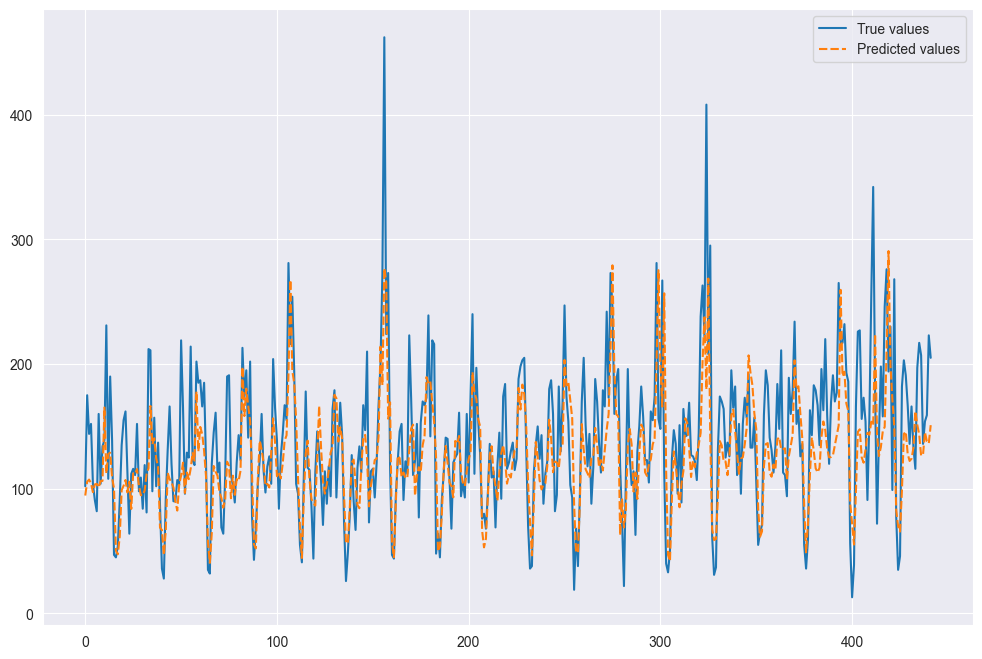

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=[y_test.reset_index(drop=True), forest_cv.best_estimator_.predict(X_test)])
plt.legend(labels=['True values', 'Predicted values']);

Видно, что модель плохо предсказывает резкое повышение количества заказов. Она определённо видит закономерность и повышает прогнозное значение на пиках, но как-бы "боится" слишком сильно его завысить. Тем не менее модель проходит по критериям качества, и на этом нашу работу можно считать законченной.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
В конце проекта желательно визуализировать результаты (построить 2 временных ряда на одном графике), показать предсказанные значения лучшей модели и реальные тестовые
        


<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Добавил визуализацию.
</div> 

## Итоговый вывод

В рамках подготовки данных, мы:
- Провели загрузку и ознакомились с данными
- Провели ресемплирование по одному часу

В рамках анализа данных, мы:
- Провели разведочный анализ, удостоверились в отсутствии пропусков и аномальных значений
- Составили кастомный трансформер для подготовки признаков.

В рамках обучения моделей, мы:
- Подготовили 3 объекта OptunaSearchCV, составили сетки гиперпараметров
- Обучили, подобрали параметры и провели кросс-валидацию для трёх моделей - Лёгкого градиентного бустинга, случайного леса и регрессора k ближайших соседей.
- Отобрали модель случайного леса, как лучшую на основе метрики качества RMSE

В рамках тестирования, мы:
- Обучили модель-болванку для проверки лучшей модели на адекватность
- Обучили лучшую модель на всей тренировочной выборке и вывели метрику на тестовых данных

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с этим проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались  функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
 
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48